# Solving the Line Extending Game using AlphaZero

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

from nsai_experiments import line_extending_game_tools as lgt
from nsai_experiments import line_extending_game_gym as leg_gym

from nsai_experiments import alphazero_torch as azt
from nsai_experiments.deps import helpers

leg_name = "leg/WindowlessLineExtendingGameEnv-v0"

In [3]:
def plot_results(episode_returns, window=10):
    fig,ax = plt.subplots(1,figsize=[7,5])
    total_eps = len(episode_returns)
    episode_returns_smoothed = helpers.smooth(episode_returns,window,mode='valid') 
    ax.plot(helpers.symmetric_remove(np.arange(total_eps),window-1),episode_returns_smoothed,linewidth=4,color='darkred')
    ax.set_ylabel('Return')
    ax.set_xlabel('Episode',color='darkred')
    plt.plot()

Making game leg/WindowlessLineExtendingGameEnv-v0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 100]               0
            Linear-2                  [-1, 128]          12,928
               ELU-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
               ELU-5                  [-1, 128]               0
Total params: 29,440
Trainable params: 29,440
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.11
Estimated Total Size (MB): 0.12
----------------------------------------------------------------
Finished episode 0, total return: 57.0, total time: 3.6 sec
Finished episode 1, total return: 71.0, total time: 3.7 sec
Finished episode 2, total return: 69.0, total time: 3.8 sec
Finish

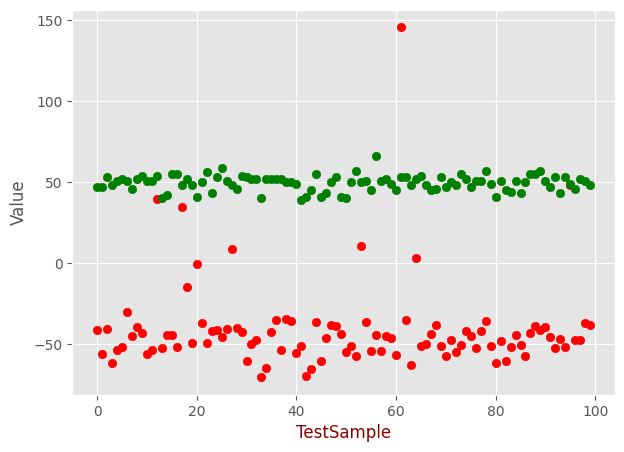

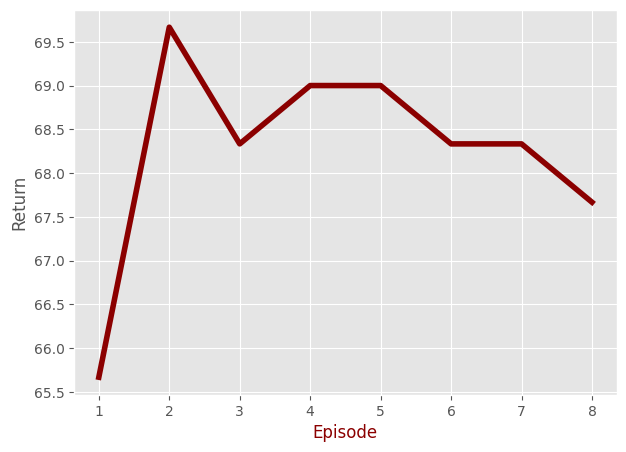

In [12]:
episode_returns,timepoints,a_best,seed_best,R_best = azt.agent(
    game=leg_name, n_ep=10, n_mcts=40, max_ep_len=100, lr=0.001,
    c=1.5, gamma=1.0, data_size=1000, batch_size=32, temp=1.0, n_hidden_layers=2, n_hidden_units=128, nsites=20)
plot_results(episode_returns, window=3)